In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1. Import dos dados

In [2]:
data = pd.read_csv("data/train.csv")
sobreviventes = data["Survived"]
data = data.drop(columns = {"Survived"})
data["Survived"] = sobreviventes

In [3]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Após isso, uma análise geral sobre o conjunto de dados

In [4]:
#Verificar linhas, colunas, tipos e valores nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Verificar métricas sobre cada coluna
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# 2. Analisando correlações no dataset

## 2.1 Análise de valores e correlações de valores numéricos, no dataset sem alterações

In [6]:
##Correlação dos dados numéricos
data.corr(numeric_only = True)["Survived"]

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

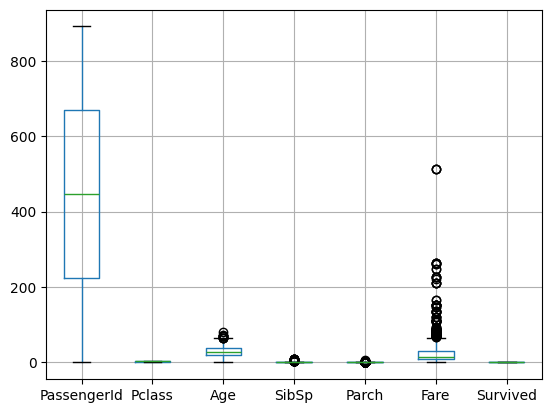

In [7]:
#Boxplot dos dados
data.boxplot()
plt.show()

## 2.2 Relação de sobreviventes com variáveis categóricas

Criação de uma função para padronizar a geração do gráficos de comparação.

In [8]:
def plot_comparacao(coluna, label_x, label_y, titulo, dataset):
    sobreviventes = dataset.groupby(coluna)["Survived"].sum()
    contagem = dataset[coluna].value_counts()
    ordem = contagem.index
    sobreviventes = dataset.groupby(coluna)["Survived"].sum().reindex(ordem)
    nao_sobreviventes = contagem - sobreviventes
    
    ##Plot
    plt.figure(figsize=(8, 5))
    plt.bar(ordem, nao_sobreviventes, label='Não Sobreviventes', color='orange')
    plt.bar(ordem, sobreviventes, bottom=nao_sobreviventes, label='Sobreviventes', color='steelblue')
    plt.title(titulo)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend()
    plt.tight_layout()
    plt.show()

### 2.2.1 Sobreviventes por sexo

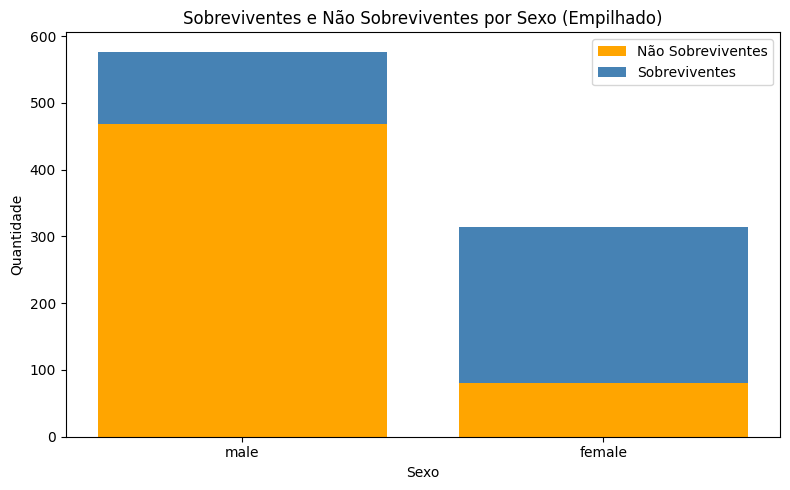

In [9]:
plot_comparacao("Sex", "Sexo", "Quantidade", "Sobreviventes e Não Sobreviventes por Sexo (Empilhado)", data)

### 2.2.2 Sobreviventes por classe

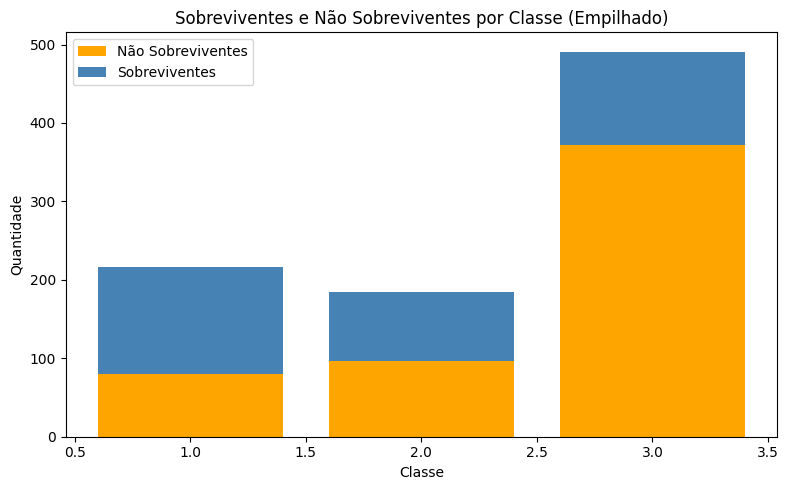

In [10]:
plot_comparacao("Pclass", "Classe", "Quantidade", "Sobreviventes e Não Sobreviventes por Classe (Empilhado)", data)

### 2.2.3 Sobreviventes por Local de embarque

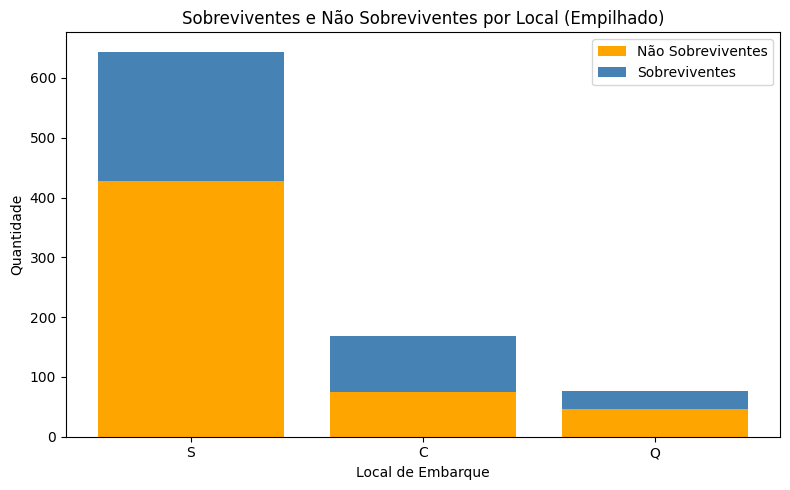

In [11]:
plot_comparacao("Embarked", "Local de Embarque", "Quantidade", "Sobreviventes e Não Sobreviventes por Local (Empilhado)", data)

## 2.3 Relação de sobreviventes com variáveis não-categóricas

### 2.3.1 Sobreviventes e parentesco

Criação de função de plot para melhor visualização

In [12]:
def plot_comparacao_cat(coluna, dataset):
    sobreviventes = dataset.groupby(coluna)["Survived"].sum()
    contagem = dataset[coluna].value_counts()
    ordem = contagem.index
    sobreviventes = dataset.groupby(coluna)["Survived"].sum().reindex(ordem)
    
    # Criando dois subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    # Histograma dos Não Sobreviventes
    ax1.bar(ordem, contagem, color='slategray')
    ax1.set_title(f"Contagem por Parentesco ({coluna})")
    ax1.set_xlabel("Parentesco")
    ax1.set_ylabel("Quantidade")
    
    # Histograma dos Sobreviventes
    ax2.bar(ordem, sobreviventes, color='steelblue')
    ax2.set_title(f"Sobreviventes por Parentesco ({coluna})")
    ax2.set_xlabel("Parentesco")
    
    plt.tight_layout()
    plt.show()

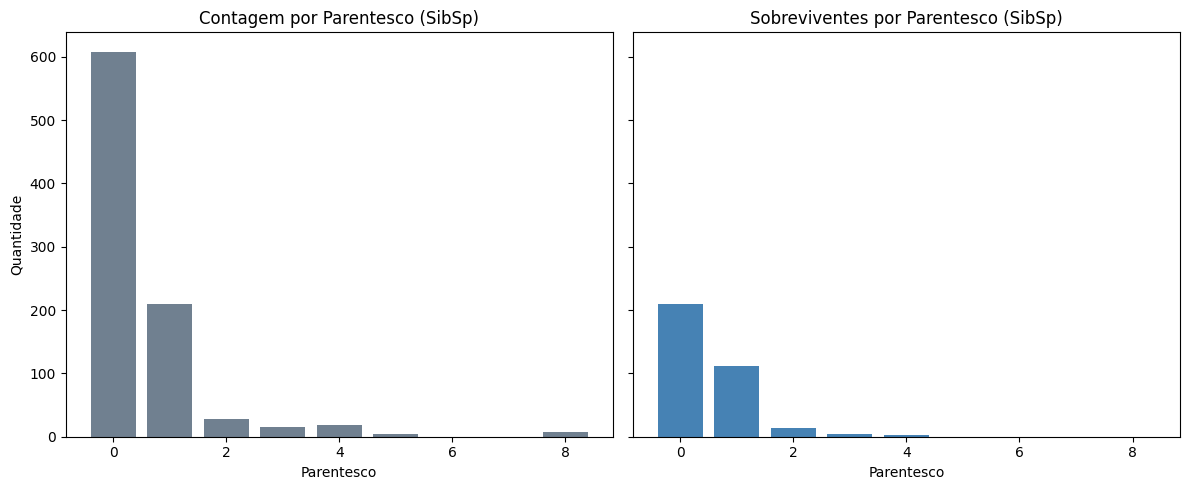

In [13]:
plot_comparacao_cat("SibSp", data)

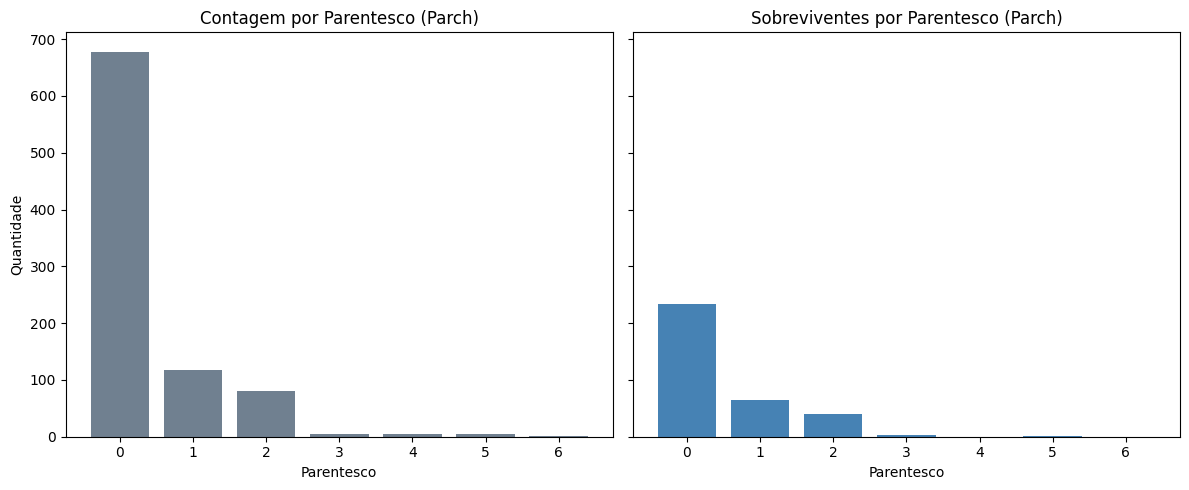

In [14]:
plot_comparacao_cat("Parch", data)

### 2.3.2 Distribuição de sobreviventes por idade

Criação de função de plot para melhor visualização de histograma

In [15]:
def plot_hist(coluna, dataset, x_label, y_label, titulo):
    # Histograma combinado: todos + apenas sobreviventes
    plt.figure(figsize=(8, 5))
    
    # Todos os passageiros (com idade conhecida)
    dataset[coluna].dropna().plot.hist(bins=20, edgecolor='black', color='slategray', alpha=0.6, label="Todos")
    
    # Apenas sobreviventes
    idades_sobreviveram = dataset[dataset["Survived"] == 1][coluna].dropna()
    plt.hist(idades_sobreviveram, bins=20, edgecolor='black', color='steelblue', alpha=0.6, label="Sobreviventes")
    
    # Título e legendas
    plt.title(titulo)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.tight_layout()
    plt.show()


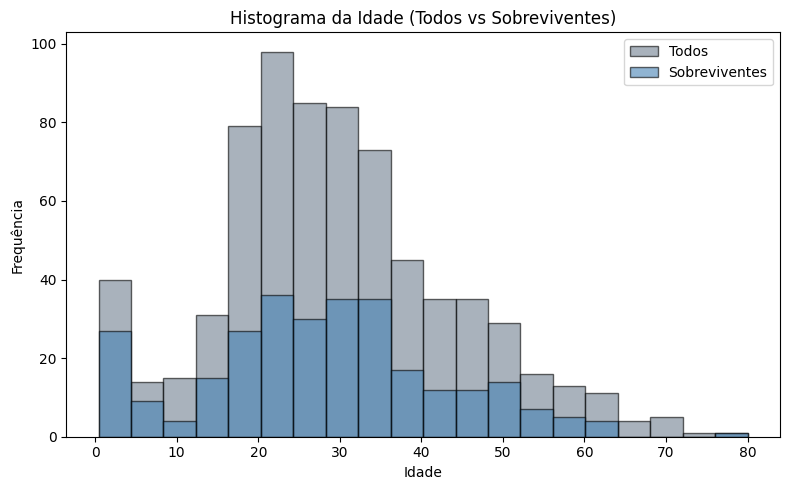

In [16]:
plot_hist("Age", data, "Idade", "Frequência", "Histograma da Idade (Todos vs Sobreviventes)")

### 2.3.3 Distribuição de sobreviventes por tarifa

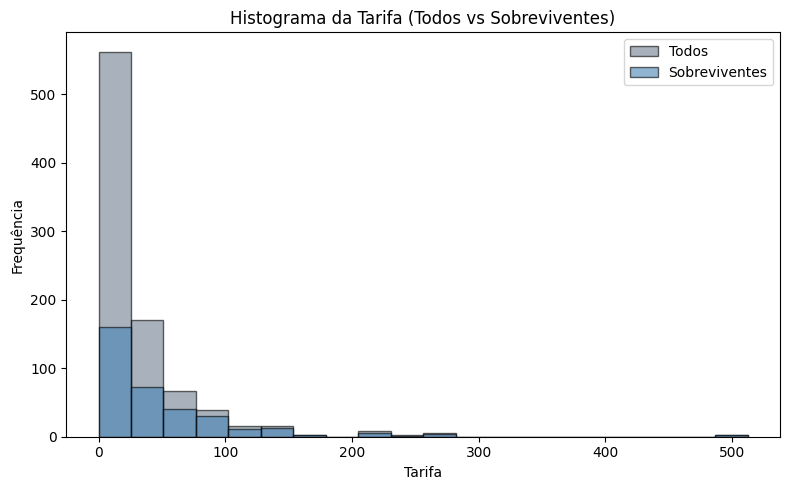

In [17]:
plot_hist("Fare", data, "Tarifa", "Frequência", "Histograma da Tarifa (Todos vs Sobreviventes)")

## 2.4 Testes de correlação, transformando variáveis categóricas em numéricas

In [18]:
##Transformar tabelas em numéricas
data_mod = data.copy()
data_mod = pd.get_dummies(data_mod, columns=['Sex'], prefix='Sex')
data_mod = pd.get_dummies(data_mod, columns=['Embarked'], prefix='Embarked')

In [19]:
data_mod["Embarked_C"] = data_mod["Embarked_C"].map({True: 1, False: 0})
data_mod["Embarked_Q"] = data_mod["Embarked_Q"].map({True: 1, False: 0})
data_mod["Embarked_S"] = data_mod["Embarked_S"].map({True: 1, False: 0})
data_mod["Sex_male"] = data_mod["Sex_male"].map({True: 1, False: 0})
data_mod["Sex_female"] = data_mod["Sex_female"].map({True: 1, False: 0})

In [20]:
data_mod = data_mod.drop(columns = {"PassengerId", "Name", "Ticket", "Cabin"})

In [21]:
data_mod

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,3,NaN,1,2,23.4500,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [22]:
correlacoes = data_mod.corr(method='pearson', numeric_only=True)

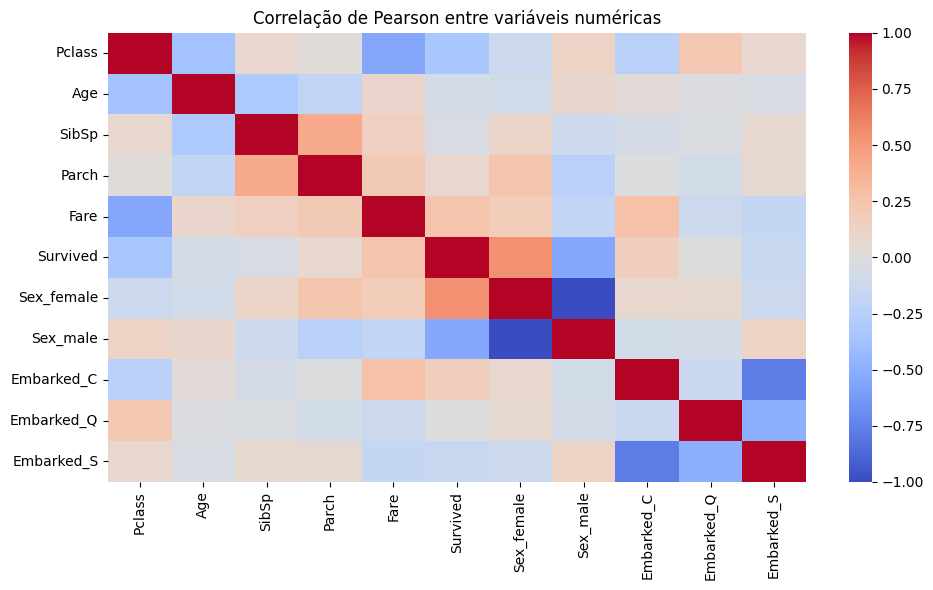

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlação de Pearson entre variáveis numéricas")
plt.tight_layout()
plt.show()

In [24]:
##Analisando a variável idade por sobreviventes e sexo
data_mod.groupby(['Survived','Sex_male'])['Age'].describe()

count       mean        std   min    25%   50%    75%   max
Survived Sex_male                                                             
0        0          64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
         1         360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
1        0         197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
         1          93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

In [25]:
##Analisando a variável idade por sobreviventes e classe
data_mod.groupby(['Survived', 'Pclass'])['Age'].describe()

count       mean        std    min    25%    50%    75%   max
Survived Pclass                                                               
0        1        64.0  43.695312  15.284243   2.00  31.00  45.25  55.25  71.0
         2        90.0  33.544444  12.151581  16.00  25.00  30.50  39.00  70.0
         3       270.0  26.555556  12.334882   1.00  19.00  25.00  33.00  74.0
1        1       122.0  35.368197  13.760017   0.92  24.25  35.00  45.00  80.0
         2        83.0  25.901566  14.837787   0.67  17.50  28.00  34.00  62.0
         3        85.0  20.646118  11.995047   0.42  14.00  22.00  29.00  63.0

## 2.5 Análise de correlação com base em extração de informações das colunas

In [26]:
#Cópia do conjunto de dados
data_mod2 = data.copy()
data_mod2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


### 2.5.1 Extração dos títulos de cada passageiro (Mr, Mrs, Miss, ...)

In [27]:
data_mod2["Name"] = data_mod2["Name"].str.extract(r',\s*([^\.]+)\.')
data_mod2["Name"].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

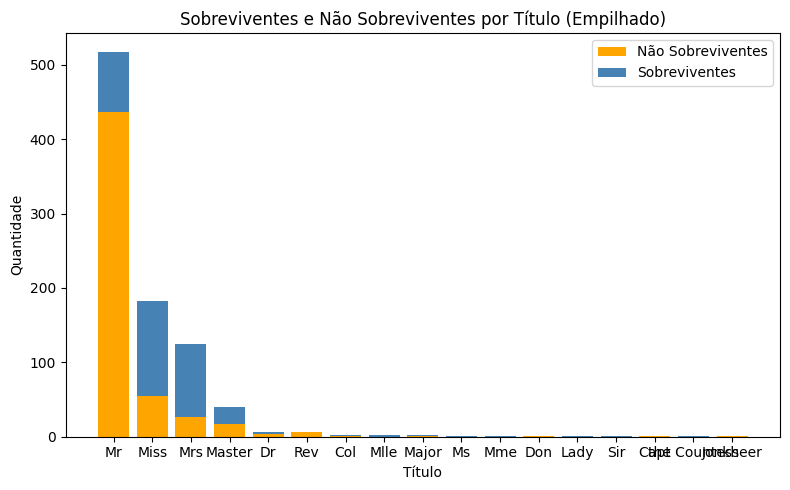

In [28]:
plot_comparacao("Name", "Título", "Quantidade", "Sobreviventes e Não Sobreviventes por Título (Empilhado)", data_mod2)

### 2.5.2 Análise de Registro de Cabine

Verificar a quantidade de cabines registradas no nome de uma pessoa

In [29]:
data["Cabin"].value_counts().head(10)

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
E101           3
C22 C26        3
F33            3
C83            2
C123           2
Name: count, dtype: int64

In [30]:
data_mod2['Cabin_Multiple'] = data_mod2['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
data_mod2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cabin_Multiple
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0,0
887,888,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,Mr,male,26.0,0,0,111369,30.0000,C148,C,1,1


Os que não possui cabine registrada, ou com valores nulos, foram marcados com 0

In [31]:
data_mod2["Cabin_Multiple"].value_counts()

Cabin_Multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

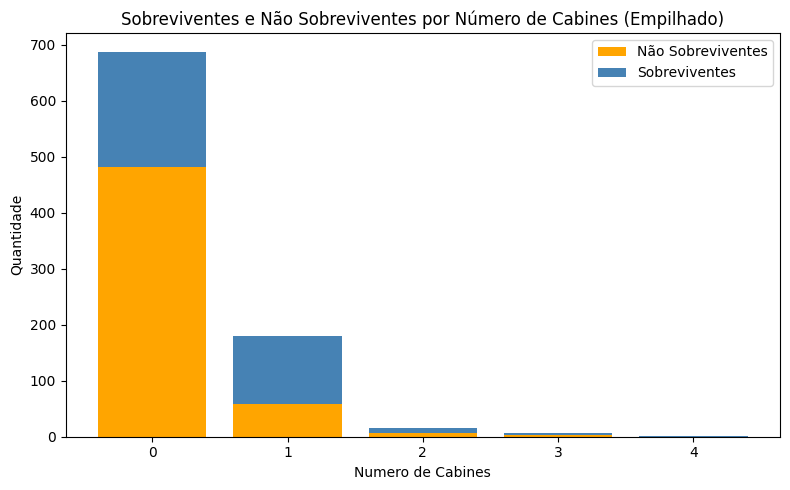

In [32]:
plot_comparacao("Cabin_Multiple", "Numero de Cabines", "Quantidade", "Sobreviventes e Não Sobreviventes por Número de Cabines (Empilhado)", data_mod2)

Verificar o prefixo de cada cabine, antes do no número e classificar. Os que não possuem cabine registrada, adotou-se valor "n"

In [33]:
data_mod2['Cabin_Pref'] = data_mod2['Cabin'].apply(lambda x: str(x)[0])
data_mod2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cabin_Multiple,Cabin_Pref
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,n
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1,1,C
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0,0,n
887,888,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1,1,B
888,889,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,n
889,890,1,Mr,male,26.0,0,0,111369,30.0000,C148,C,1,1,C


In [34]:
data_mod2['Cabin_Pref'].value_counts()

Cabin_Pref
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

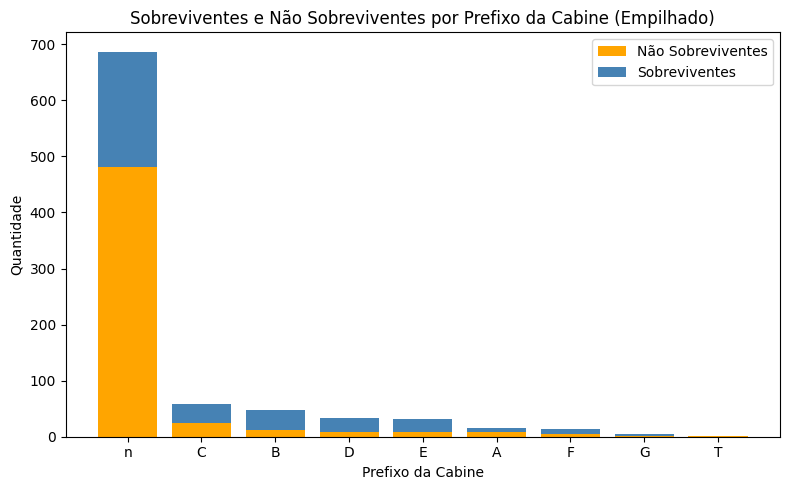

In [35]:
plot_comparacao("Cabin_Pref", "Prefixo da Cabine", "Quantidade", "Sobreviventes e Não Sobreviventes por Prefixo da Cabine (Empilhado)", data_mod2)

### 2.5.3 Análise de número dos bilhetes

Verificar se bilhetes numéricos ou não possuem diferença na relação de sobreviventes

In [36]:
data_mod2['Numeric_Ticket'] = data_mod2["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)
data_mod2['Numeric_Ticket'].value_counts()

Numeric_Ticket
1    661
0    230
Name: count, dtype: int64

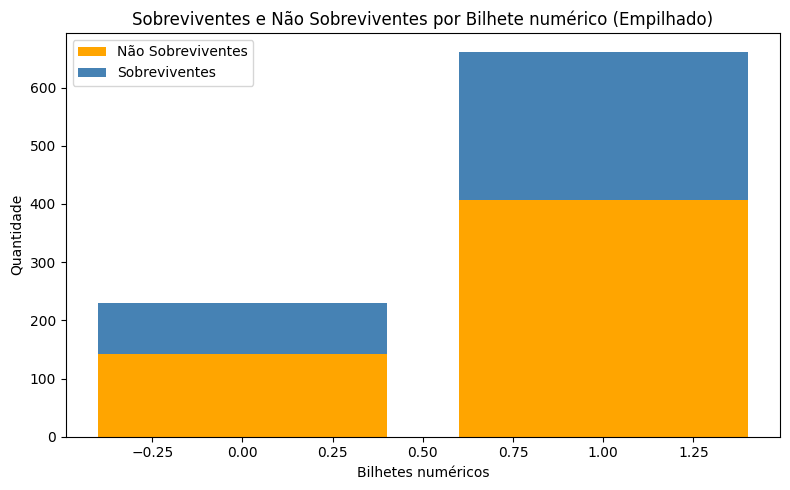

In [37]:
plot_comparacao("Numeric_Ticket", "Bilhetes numéricos", "Quantidade", "Sobreviventes e Não Sobreviventes por Bilhete numérico (Empilhado)", data_mod2)

### 2.5.4 Análise de prefixo dos bilhetes

In [38]:
##Extrair prefixo
data_mod2["Prefix_Ticket"] = data_mod2["Ticket"].str.extract(r"^(.*?)(?=\s\d)")
data_mod2["Prefix_Ticket"] = data_mod2["Prefix_Ticket"].str.strip()
data_mod2["Prefix_Ticket"] = data_mod2["Prefix_Ticket"].fillna("n")

In [39]:
data_mod2["Prefix_Ticket"].value_counts()

Prefix_Ticket
n              665
PC              60
C.A.            27
STON/O          12
A/5             10
W./C.            9
SOTON/O.Q.       8
CA.              8
A/5.             7
SOTON/OQ         7
CA               6
STON/O2.         6
F.C.C.           5
SC/PARIS         5
C                5
S.O.C.           5
SC/Paris         4
S.O./P.P.        3
PP               3
A/4.             3
A/4              3
A./5.            2
S.C./PARIS       2
A.5.             2
SC/AH            2
P/PP             2
WE/P             2
SOTON/O2         2
S.C./A.4.        1
S.O.P.           1
Fa               1
A4.              1
SO/C             1
S.P.             1
W.E.P.           1
SW/PP            1
SC/AH Basle      1
A/S              1
SC               1
SCO/W            1
W/C              1
S.W./PP          1
F.C.             1
C.A./SOTON       1
Name: count, dtype: int64

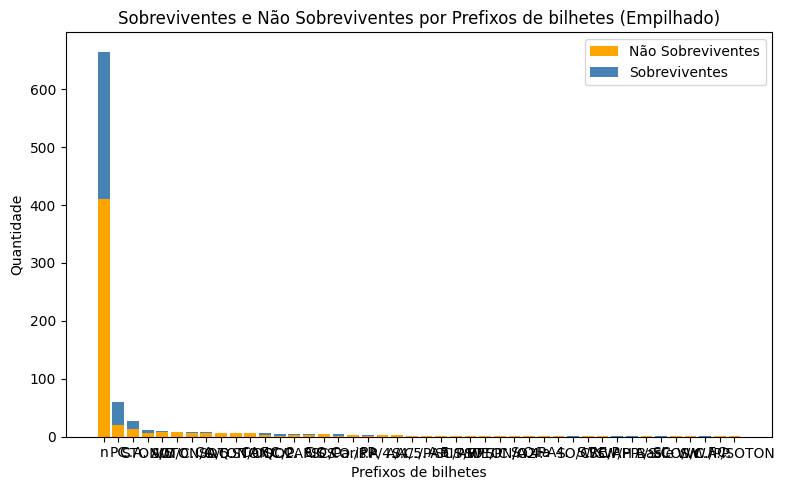

In [40]:
plot_comparacao("Prefix_Ticket", "Prefixos de bilhetes", "Quantidade", "Sobreviventes e Não Sobreviventes por Prefixos de bilhetes (Empilhado)", data_mod2)

## 2.6 Transformar em numérico e rever correlações com sobreviventes, de acordo com novas colunas

In [41]:
data_mod2 = pd.get_dummies(data_mod2, columns=['Sex'], prefix='Sex')
data_mod2 = pd.get_dummies(data_mod2, columns=['Name'], prefix='Name')
data_mod2 = pd.get_dummies(data_mod2, columns=['Embarked'], prefix='Embarked')
data_mod2 = pd.get_dummies(data_mod2, columns=['Cabin_Pref'], prefix='Cabin_Pref')
data_mod2 = pd.get_dummies(data_mod2, columns=['Prefix_Ticket'], prefix='Prefix_Ticket')

In [42]:
data_mod2 = data_mod2.drop(columns = {"PassengerId", "Ticket", "Cabin"})

In [43]:
correlacoes = data_mod2.corr(method='pearson', numeric_only = True)["Survived"].sort_values(ascending = False)
correlacoes

Survived          1.000000
Sex_female        0.543351
Name_Mrs          0.339040
Name_Miss         0.327093
Cabin_Multiple    0.277053
                    ...   
Embarked_S       -0.155660
Cabin_Pref_n     -0.316912
Pclass           -0.338481
Sex_male         -0.543351
Name_Mr          -0.549199
Name: Survived, Length: 83, dtype: float64

In [44]:
#Se for adotado um limiar de correlação:
correlacoes_limiar = correlacoes[correlacoes.abs() > 0.1]
correlacoes_limiar

Survived            1.000000
Sex_female          0.543351
Name_Mrs            0.339040
Name_Miss           0.327093
Cabin_Multiple      0.277053
Fare                0.257307
Cabin_Pref_B        0.175095
Embarked_C          0.168240
Cabin_Pref_D        0.150716
Prefix_Ticket_PC    0.147062
Cabin_Pref_E        0.145321
Cabin_Pref_C        0.114652
Embarked_S         -0.155660
Cabin_Pref_n       -0.316912
Pclass             -0.338481
Sex_male           -0.543351
Name_Mr            -0.549199
Name: Survived, dtype: float64

### 2.7 Teste de correlação com P-valor

Foi realizado o teste de correlação com base no p-valor, o qual indica a significância estatística da relação entre as variáveis. Adotou-se o valor de 0,05 como limiar para o p-valor, um parâmetro amplamente utilizado, que significa haver menos de 5% de chance de a correlação observada ter ocorrido ao acaso. Nesta análise, investigou-se a relação das variáveis em comparação com a coluna de sobrevivência.

In [45]:
##Tirar os nulos colocando média de idade
data_mod2["Age"] = data_mod2["Age"].fillna(data_mod2["Age"].mean())

In [46]:
colunas = data_mod2.columns

In [47]:
columns_select = []

for i in range(int(len(colunas))):
    r, p_valor = pearsonr(data_mod2['Survived'], data_mod2[colunas[i]])
    if p_valor < 0.05:
        print(f"Survived com {colunas[i]}. P-valor:", p_valor)
        columns_select.append(colunas[i])

Survived com Pclass. P-valor: 2.537047387981394e-25
Survived com Age. P-valor: 0.03721708372685032
Survived com Parch. P-valor: 0.01479924537472799
Survived com Fare. P-valor: 6.120189341924488e-15
Survived com Survived. P-valor: 0.0
Survived com Cabin_Multiple. P-valor: 3.646346569275977e-17
Survived com Sex_female. P-valor: 1.40606613088011e-69
Survived com Sex_male. P-valor: 1.40606613088011e-69
Survived com Name_Master. P-valor: 0.010932112882201354
Survived com Name_Miss. P-valor: 1.1599907445248449e-23
Survived com Name_Mr. P-valor: 2.4287826448475315e-71
Survived com Name_Mrs. P-valor: 2.0941266637302418e-25
Survived com Embarked_C. P-valor: 4.3971513298069876e-07
Survived com Embarked_S. P-valor: 3.036111064521921e-06
Survived com Cabin_Pref_B. P-valor: 1.4415837054874305e-07
Survived com Cabin_Pref_C. P-valor: 0.0006061874181549409
Survived com Cabin_Pref_D. P-valor: 6.233140155819937e-06
Survived com Cabin_Pref_E. P-valor: 1.3316539695856369e-05
Survived com Cabin_Pref_n. P-v

In [48]:
##Dataset após filtro com p-valor
data_mod2[columns_select]

,Pclass,Age,Parch,Fare,Survived,Cabin_Multiple,Sex_female,Sex_male,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Embarked_C,Embarked_S,Cabin_Pref_B,Cabin_Pref_C,Cabin_Pref_D,Cabin_Pref_E,Cabin_Pref_n,Prefix_Ticket_PC
0,3,22.000000,0,7.2500,0,0,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,1,38.000000,0,71.2833,1,1,True,False,False,False,False,True,True,False,False,True,False,False,False,True
2,3,26.000000,0,7.9250,1,0,True,False,False,True,False,False,False,True,False,False,False,False,True,False
3,1,35.000000,0,53.1000,1,1,True,False,False,False,False,True,False,True,False,True,False,False,False,False
4,3,35.000000,0,8.0500,0,0,False,True,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,13.0000,0,0,False,True,False,False,False,False,False,True,False,False,False,False,True,False
887,1,19.000000,0,30.0000,1,1,True,False,False,True,False,False,False,True,True,False,False,False,False,False
888,3,29.699118,2,23.4500,0,0,True,False,False,True,False,False,False,True,False,False,False,False,True,False
889,1,26.000000,0,30.0000,1,1,False,True,False,False,True,False,True,False,False,True,False,False,False,False


In [49]:
columns_select

['Pclass',
 'Age',
 'Parch',
 'Fare',
 'Survived',
 'Cabin_Multiple',
 'Sex_female',
 'Sex_male',
 'Name_Master',
 'Name_Miss',
 'Name_Mr',
 'Name_Mrs',
 'Embarked_C',
 'Embarked_S',
 'Cabin_Pref_B',
 'Cabin_Pref_C',
 'Cabin_Pref_D',
 'Cabin_Pref_E',
 'Cabin_Pref_n',
 'Prefix_Ticket_PC']